# Завдання

*Завдання 1: Розбийте MNIST на тренувальну та навчальну вибірки (60k + 10k). Натренуйте Random Forest classifier ти виміряйте час тренування. Обчисліть точність на тестовій вибірці.*

In [61]:
from sklearn.datasets import fetch_openml
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import time
from sklearn.preprocessing import StandardScaler
mnist = fetch_openml('mnist_784', version=1, cache=True)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

Розбиваємо датасет на тренувальну та тестову вибірку (60k/10k), попередньо імпортувавши необхідні бібліотеки.

In [18]:
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

Перевіримо коректність розбиття.

In [25]:
print(f"X_train.shape = {X_train.shape}, X_test.shape = {X_test.shape}")

X_train.shape = (60000, 784), X_test.shape = (10000, 784)


In [34]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Створимо функцію для зручного вимірювання метрик моделей.

In [24]:
def display_metrics(model, X_test, y_test, title):
    fig, ax = plt.subplots(figsize=(6,4))
    y_pred = model.predict(X_test)
    cm_list = confusion_matrix(y_test, y_pred)
    cm_plot = sns.heatmap(cm_list, annot=True, cmap="viridis", fmt="g", ax=ax)
    cm_plot.set_xlabel("Actual values")
    cm_plot.set_ylabel("Predicted values")
    cm_plot.set_title(title)
    plt.show()
    report = classification_report(y_test, y_pred)
    print(report)

Натренуємо RandomForest та обчислимо час тренування.

In [29]:
random_forest = RandomForestClassifier(random_state=42)
training_start = time.perf_counter()
random_forest.fit(X_train, y_train)
training_end = time.perf_counter()
knn_train_time = training_end - training_start
print(f"Час, затрачений на тренування моделі: {knn_train_time} секунд")

Час, затрачений на тренування моделі: 39.77275250013918 секунд


Виміряємо точність на тестовій вибірці.

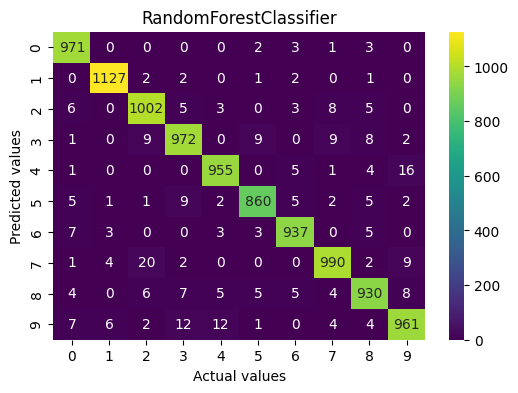

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [32]:
display_metrics(random_forest, X_test, y_test, "RandomForestClassifier")

Отримали доволі високі результати.

*Завдання 2: Застосуйте PCA з поясненою дисперсією 95%. Повторіть тренування. Порівняйте час тренування та точніть з попередньою вправою.*

Зробимо PCA з дисперсією в 95% і застосуємо його до нашого датасету.

In [52]:
pca = PCA(n_components=0.95)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

Перевіримо тепер розмірність нашого датасету.

In [53]:
print(f"X_train_pca.shape = {X_train_pca.shape}, X_test_pca.shape = {X_test_pca.shape}")

X_train_pca.shape = (60000, 154), X_test_pca.shape = (10000, 154)


Повторимо попередні дії після зменшення розмірності нашого датасету.

In [54]:
random_forest_pca = RandomForestClassifier(random_state=42)
training_start = time.perf_counter()
random_forest_pca.fit(X_train_pca, y_train)
training_end = time.perf_counter()
knn_train_time = training_end - training_start
print(f"Час, затрачений на тренування моделі: {knn_train_time} секунд")

Час, затрачений на тренування моделі: 123.07493809983134 секунд


Час тренування моделі суттєво збільшився.

Тепер виміряємо наші метрики нової моделі на тестовій вибірці.

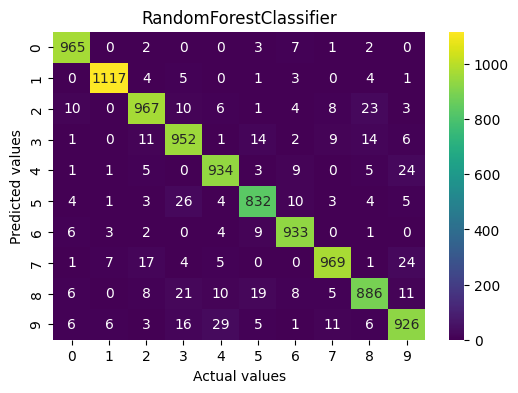

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.95      0.94      0.94      1032
           3       0.92      0.94      0.93      1010
           4       0.94      0.95      0.95       982
           5       0.94      0.93      0.94       892
           6       0.95      0.97      0.96       958
           7       0.96      0.94      0.95      1028
           8       0.94      0.91      0.92       974
           9       0.93      0.92      0.92      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



In [55]:
display_metrics(random_forest_pca, X_test_pca, y_test, "RandomForestClassifier")

Як бачимо, зменшення розмірності призвело до незначних втрат в наших метриках.

*Завдання 3: Повторіть ці ж кроки з логістичною регресією. Зробіть висновки.*

Для тренування логістичної регресії спочатку нормалізуємо наші дані.

In [57]:
scaler = StandardScaler()

Навчимо і застосуємо наш масштабувальник.

In [59]:
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

Тепер перейдемо до тренування нашої логістичної регресії

Гіперпараметр max_iter виставимо на 15 000, оскільки за менші значення coef_ не зійшовся.

In [63]:
log_clf = LogisticRegression(C=0.3593813663804626, l1_ratio=0.5, max_iter=15000, penalty='elasticnet', solver='saga')
training_start = time.perf_counter()
log_clf.fit(X_train_normalized, y_train)
training_end = time.perf_counter()
knn_train_time = training_end - training_start
print(f"Час, затрачений на тренування моделі: {knn_train_time} секунд")

Час, затрачений на тренування моделі: 19243.678866100032 секунд


Виведемо метрики.

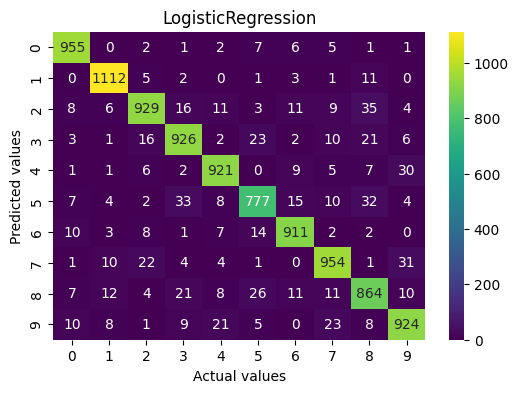

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.92      1032
           3       0.91      0.92      0.91      1010
           4       0.94      0.94      0.94       982
           5       0.91      0.87      0.89       892
           6       0.94      0.95      0.95       958
           7       0.93      0.93      0.93      1028
           8       0.88      0.89      0.88       974
           9       0.91      0.92      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [65]:
display_metrics(log_clf, X_test_normalized, y_test, "LogisticRegression")

Застосуємо PCA до наших нормалізованих даних.

In [64]:
X_train_normalized_pca = pca.fit_transform(X_train_normalized)
X_test_normalized_pca = pca.transform(X_test_normalized)

Тепер ще раз натренуємо модель, але на зменшеному датасеті.

In [66]:
log_clf_pca = LogisticRegression(C=0.3593813663804626, l1_ratio=0.5, max_iter=15000, penalty='elasticnet', solver='saga')
training_start = time.perf_counter()
log_clf_pca.fit(X_train_normalized_pca, y_train)
training_end = time.perf_counter()
knn_train_time = training_end - training_start
print(f"Час, затрачений на тренування моделі: {knn_train_time} секунд")

Час, затрачений на тренування моделі: 4364.356980799697 секунд


Як бачимо, час, затрачений на тренування моделі, суттєво зменшився.

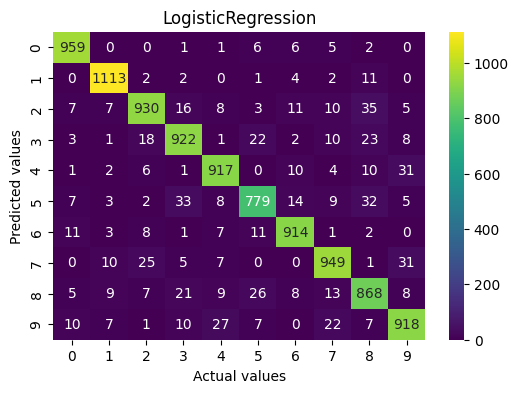

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.92      1032
           3       0.91      0.91      0.91      1010
           4       0.93      0.93      0.93       982
           5       0.91      0.87      0.89       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.92      1028
           8       0.88      0.89      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [67]:
display_metrics(log_clf_pca, X_test_normalized_pca, y_test, "LogisticRegression")

Як можемо помітити, PCA трохи покращив метрики нашої моделі.

Отже, при застосуванні PCA до RandomForestClassifier час тренування збільшився, а метрики трошки погіршилися, а у випадку з логістичною регресією
вийшло все навпаки: час суттєво зменшився, а метрики трошки покращилися.